# Problem Statement:
#### The dataset consists of data collected from heavy scania trucks in everyday usage.
#### The system in focus is the air pressure system(APS) which generates pressurised air that are 
#### utilized in various functions in a truck, such as bracking and gear changes. The datasets positive class consists of component failures for a
#### specific component of the APS system.
#### The negative class consists of trucks with failures for components not related to the APS.
#### The data consists of trucks with failures for components not related to the APS. 
#### The data consists of a subset of all available data,selected by experts.
#### Chalange Matric




#### cost-metric of miss-classification
#### Predicted class | True Class    |
####                |  pos  | neg   |
#### ------------------------------------
#### pos             |   -   | cost_1|
#### neg             | Cost_2|  -    |

### cost_1=10 and cost_2=500
### The total cost of a prediction model the sum of 'Cost_1'
### multiplied by the number of Instances with type 1 failure
### and 'Cost_2' with the number of instances with type 2 failure,
### resulting in a 'Total_cost'.

### In above case cost_1 refer to the cost of an unnessecary checks 
### needs to be done by an mechanic at an workshop, 
### while cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.
### Total_cost=cost_1*No_instances + cost_2 * NO_instances

### Solution: From the above problem statement we could observe that 
### we have to reduce false positive and false negative.
### More importantly we have to reduce false negative , since cost 
### incurred by false negative is 50 times higher than the false positives.

In [1]:
# First we import imp Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Now Load Dataset

In [4]:
df_train=pd.read_csv(r"E:\C Drive Backup\Data Science Notes\DS Batch - 8\09_Supervised_Machine_Learning\02_Logistic_Regression\aps_failure_training_set.csv")

In [5]:
df_train.shape

(60000, 171)

In [7]:
# checking features
df_train.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [8]:
# There is a one dependent (Target) Variables and rest 170 Independent variables.

In [9]:
# Testing Output of Dependent
df_train['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [10]:
# The output of dependent variables is highly imbalance. the neg output is 60 times the pos output
# now checking datatypes of all columns
df=df_train
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [11]:
#now we saperate numeric and categorical features
col_num =[col for col in df.columns if df[col].dtypes!='object']
col_cat=[col for col in df.columns if df[col].dtypes=='object']

In [12]:
# BY inspecting features we found that
print('There are {} Numerical Features : {}'.format(len(col_num),col_num))

There are 1 Numerical Features : ['aa_000']


In [15]:
print(f'There are {len(col_cat)} Categorical Features : {col_cat}')

There are 170 Categorical Features : ['class', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_0

In [13]:
# NOw checking null values
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [14]:
# no null values
#checking values
print(df.head(15))

   class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0    neg   76698     na  2130706438    280      0      0      0      0      0   
1    neg   33058     na           0     na      0      0      0      0      0   
2    neg   41040     na         228    100      0      0      0      0      0   
3    neg      12      0          70     66      0     10      0      0      0   
4    neg   60874     na        1368    458      0      0      0      0      0   
5    neg   38312     na  2130706432    218      0      0      0      0      0   
6    neg      14      0           6     na      0      0      0      0      0   
7    neg  102960     na  2130706432    116      0      0      0      0      0   
8    neg   78696     na           0     na      0      0      0      0      0   
9    pos  153204      0         182     na      0      0      0      0      0   
10   neg   39196     na         204    170      0      0      0      0      0   
11   neg   45912     na     

In [15]:
# There is lots of null values are replaced by na so making it null first
df=df.replace('na',np.nan)

In [16]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [17]:
# since here data is not measurable wrt null values so we collect percentage of null values
per_null=np.round(df.isnull().sum()/df.shape[0]*100,0)
print(per_null)

class      0.0
aa_000     0.0
ab_000    77.0
ac_000     6.0
ad_000    25.0
          ... 
ee_007     1.0
ee_008     1.0
ee_009     1.0
ef_000     5.0
eg_000     5.0
Length: 171, dtype: float64


In [18]:
# now checking null values greater then 90%
per_null[per_null>90]

Series([], dtype: float64)

In [19]:
# Now checking null values greater then 80%
per_null[per_null>80]

bq_000    81.0
br_000    82.0
dtype: float64

In [20]:
# NOw checking null values greater then 70%
per_null[per_null>70]

ab_000    77.0
bn_000    73.0
bo_000    77.0
bp_000    80.0
bq_000    81.0
br_000    82.0
cr_000    77.0
dtype: float64

In [21]:
# now cheking null values greater then 60%
per_null[per_null>60]

ab_000    77.0
bm_000    66.0
bn_000    73.0
bo_000    77.0
bp_000    80.0
bq_000    81.0
br_000    82.0
cr_000    77.0
dtype: float64

In [22]:
per_null[per_null>50]

ab_000    77.0
bm_000    66.0
bn_000    73.0
bo_000    77.0
bp_000    80.0
bq_000    81.0
br_000    82.0
cr_000    77.0
dtype: float64

In [23]:
# By observing we found that in 8 columns more then 60% are null values
# and 7 columns has more then 70 percent missing values. so it will worth nothing to treat these large number of nun values. 
# so it is better to remove the null in 8 columns

In [24]:
missing_col=per_null[per_null>60]
missing_col.index

Index(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'],
      dtype='object')

In [25]:
df.drop(per_null[per_null>60].index,axis=1,inplace=True)

In [26]:
# dataset shape after droping columns
df.shape

(60000, 163)

In [27]:
# now checking percentage of missing values in dataset
total_missing=df.isnull().sum().sum()
total_values=np.product(df.shape)
per_missing =round(total_missing/total_values*100,2)
print('Total {} % missing values found in Dataset.'.format(per_missing))

Total 4.93 % missing values found in Dataset.


In [28]:
for col in df.columns:
    if df[col].dtype=='O' and col !='class':
        df[col]=df[col].astype(float)
        

In [29]:
# now our cleaning is done in dataset. but before moving further we save this dataset to csv
df.to_csv('aps_failure_cleaned.csv',index=False)

In [31]:
# Now we move to statistical analysis 
print(df.describe())

             aa_000        ac_000        ad_000        ae_000        af_000  \
count  6.000000e+04  5.666500e+04  4.513900e+04  57500.000000  57500.000000   
mean   5.933650e+04  3.560143e+08  1.906206e+05      6.819130     11.006817   
std    1.454301e+05  7.948749e+08  4.040441e+07    161.543373    209.792592   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%    8.340000e+02  1.600000e+01  2.400000e+01      0.000000      0.000000   
50%    3.077600e+04  1.520000e+02  1.260000e+02      0.000000      0.000000   
75%    4.866800e+04  9.640000e+02  4.300000e+02      0.000000      0.000000   
max    2.746564e+06  2.130707e+09  8.584298e+09  21050.000000  20070.000000   

             ag_000        ag_001        ag_002        ag_003        ag_004  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean   2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04  4.370966e+05   
std    2.047846e+04  3.420053e+04  1.503220e+05  7.

In [32]:
df.memory_usage()

Index        132
class     480000
aa_000    480000
ac_000    480000
ad_000    480000
           ...  
ee_007    480000
ee_008    480000
ee_009    480000
ef_000    480000
eg_000    480000
Length: 164, dtype: int64

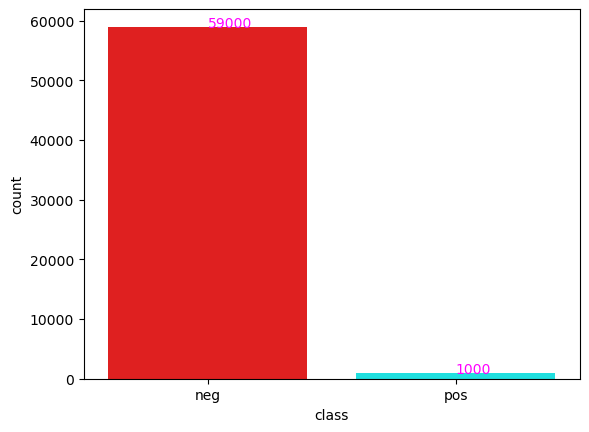

In [33]:
# Visualization of Unique values in Target Variable
sns.countplot(x='class',data=df,palette=['red','cyan'])
plt.text('neg',df['class'].value_counts()[0],df['class'].value_counts()[0],color='Magenta')
plt.text('pos',df['class'].value_counts()[1],df['class'].value_counts()[1],color='Magenta')
plt.show()

In [34]:
# This clearly shows that the target output is imbalanced. i.e. negative samples are more than positive samples


In [35]:
# Now checking Multicolinearity in Numerical features
# first we saprate dependent and independent variables into x and y where x is independent and y is dependent

In [36]:
x=df[[col for col in df.columns if col !='class']]
y=df['class']


In [37]:
x.shape

(60000, 162)

In [38]:
y.shape

(60000,)

In [40]:
print(x.corr())

          aa_000    ac_000    ad_000    ae_000    af_000    ag_000    ag_001  \
aa_000  1.000000 -0.032055 -0.001903  0.061971  0.089474  0.018610  0.143153   
ac_000 -0.032055  1.000000 -0.002380 -0.004997 -0.010554  0.017620 -0.001088   
ad_000 -0.001903 -0.002380  1.000000 -0.000214 -0.000269 -0.000047 -0.000131   
ae_000  0.061971 -0.004997 -0.000214  1.000000  0.823108 -0.000430 -0.000832   
af_000  0.089474 -0.010554 -0.000269  0.823108  1.000000 -0.000534 -0.001017   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.606232 -0.029417 -0.000829  0.052357  0.070306  0.000307  0.044186   
ee_008  0.471707  0.016908 -0.002161 -0.010850 -0.013976 -0.000823  0.004878   
ee_009  0.248039  0.024354 -0.001050 -0.008206 -0.010237 -0.001230 -0.004309   
ef_000  0.019865 -0.006571 -0.000102  0.070886  0.106281 -0.000072  0.002875   
eg_000  0.037099  0.014228 -0.000120  0.041715  0.060710  0.000244  0.010930   

          ag_002    ag_003    ag_004  .

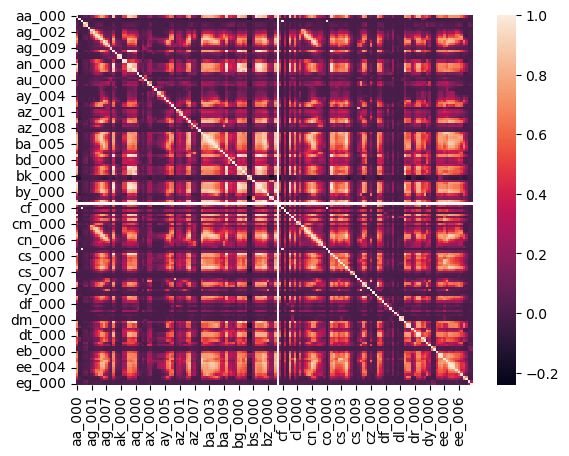

In [41]:
sns.heatmap(x.corr())
plt.show()

In [42]:
# Now we see univariate analysis
x.shape

(60000, 162)

In [60]:
plt.figure(figsize=(15,360))
plt.suptitle('Density Distribution Analysis of All Numerical Features',fontsize=20)
for i,col in enumerate(x.columns):
    plt.subplot(54,3,i+1)
    sns.distplot(x=x[col],color='brown')
    plt.title('{} Distribution'.format(col))
    plt.xlabel(col,color='blue')
    plt.ylabel('Density',color='cyan')
    plt.tight_layout(pad=1.0)
    
print(plt.show())

None


In [51]:
# Observation :By Observing Distribution almost all except few are not normally distributed.
# All the distribution is rightly skewed
# Since The problem related to classification so Transformation of Data to Normal distribution is not required.
# Also these data obtained by sensors so we do not need to intrepret each and every columns

In [262]:
# Now we start training for our cleaned data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=12)

In [263]:
x_train.shape

(40200, 162)

In [264]:
x_test.shape

(19800, 162)

In [265]:
y_train.shape

(40200,)

# 1. Model Training By Logistic Regression

In [267]:
# since the model does not accept null values so we replace them by zeros
x_train.replace(np.nan,0,inplace=True)
x_test.replace(np.nan,0,inplace=True)

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr =LogisticRegression()
lr.fit(x_train,y_train)
pred_test =lr.predict(x_test)
acc_score=accuracy_score(y_test,pred_test)
per_acc_score_lr=round(acc_score*100,2)
print('The Accuracy Score of Logistic regression model = {} %'.format(per_acc_score_lr))


The Accuracy Score of Logistic regression model = 98.86 %


In [269]:
# Confusion Metrics for this model
from sklearn.metrics import confusion_matrix
conf_mat_lr=confusion_matrix(y_test,pred_test)
print(conf_mat_lr)

[[19393    89]
 [  136   182]]


In [270]:
# saperate metrics by flatting array
tp,fp,fn,tn= conf_mat_lr.ravel()
conf_mat_lr_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
conf_mat_lr_prec=round((tp/(tp+fp))*100,2)
conf_mat_lr_recal=round((tp/(tp+fn))*100,2)
conf_mat_lr_f1=round((2*((conf_mat_lr_prec*conf_mat_lr_recal)/(conf_mat_lr_prec+conf_mat_lr_recal))),2)
conf_mat_lr_errorrate=round(((fp+fn)/(fp+fn+tp+tn))*100,2)


In [271]:
print(f'confusion metrics for Logistic Regression is :\n {conf_mat_lr}'+
     f'\nBased on This confusion metrics we deduce the following \n'+
     f'Accuracy  : {conf_mat_lr_acc} %'+
     f'\nPrecision : {conf_mat_lr_prec} % \nRecall    : {conf_mat_lr_recal}  % \n'+
     f'F1 Score  : {conf_mat_lr_f1} % \nError Rate : {conf_mat_lr_errorrate} %')

confusion metrics for Logistic Regression is :
 [[19393    89]
 [  136   182]]
Based on This confusion metrics we deduce the following 
Accuracy  : 98.86 %
Precision : 99.54 % 
Recall    : 99.3  % 
F1 Score  : 99.42 % 
Error Rate : 1.14 %


In [272]:
# Now calculating Total cost for repairing after implementing logistics Regression

In [273]:
Total_cost_lr =10*fp+500*fn
print("The Total cost of Repairing is : {} /-".format(Total_cost_lr))

The Total cost of Repairing is : 68890 /-


In [274]:
# Now we store this infor to dictionary
model_details ={'Logistic Regression': {'Model_Accuracy':per_acc_score_lr,'conf_mat':conf_mat_lr,
                                       'Conf_Mat_Accuracy':conf_mat_lr_acc,'Precision':conf_mat_lr_prec,
                                       'Recall':conf_mat_lr_recal,'F1_Score':conf_mat_lr_f1,
                                       'Error_rate':conf_mat_lr_errorrate,'Total_cost':Total_cost_lr}}

In [275]:
pd.DataFrame(model_details)

,Logistic Regression
Model_Accuracy,98.86
conf_mat,"[[19393, 89], [136, 182]]"
Conf_Mat_Accuracy,98.86
Precision,99.54
Recall,99.3
F1_Score,99.42
Error_rate,1.14
Total_cost,68890


# 2. Model Training By Decision Tree Classifier Model

In [276]:
from sklearn.tree import DecisionTreeClassifier
dt_c=DecisionTreeClassifier()
dt_c.fit(x_train,y_train)
pred_test_dt_c =dt_c.predict(x_test)
acc_dt_c =accuracy_score(y_test,pred_test_dt_c)
per_acc_dt_c=round(acc_dt_c*100,2)
print('Accuracy of the model is : {} %'.format(per_acc_dt_c))


Accuracy of the model is : 98.9 %


In [277]:
# confusion metrics
conf_mat_dt_c =confusion_matrix(y_test,pred_test_dt_c)
print(conf_mat_dt_c)

[[19377   105]
 [  113   205]]


In [278]:
tp,fp,fn,tn=conf_mat_dt_c.ravel()
conf_mat_acc_dt_c=round((tp+tn)/(tp+tn+fp+fn)*100,2)
conf_mat_pre_dt_c =round(tp/(tp+fp)*100,2)
conf_mat_rec_dt_c =round((tp/(tp+fn))*100,2)
conf_mat_f1_dt_c=round(2*(conf_mat_pre_dt_c*conf_mat_rec_dt_c/(conf_mat_pre_dt_c+conf_mat_rec_dt_c)),2)
conf_mat_error_dt_c=round(((fp+fn)/(tp+tn+fp+fn))*100,2)


In [279]:
print('Confusion Matrix summary')
print(f'Accuracy :{conf_mat_acc_dt_c} %')
print(f'Precision: {conf_mat_pre_dt_c} %')
print(f'Recall : {conf_mat_rec_dt_c} %')
print(f'F1-Score : {conf_mat_f1_dt_c} %')
print(f'Error Rate : {conf_mat_error_dt_c} %')

Confusion Matrix summary
Accuracy :98.9 %
Precision: 99.46 %
Recall : 99.42 %
F1-Score : 99.44 %
Error Rate : 1.1 %


In [280]:
# Cost calculation for Repairing 
Total_cost_dt_c =fp*10+fn*500
Total_cost_dt_c

57550

In [281]:
# now updating this details to the model details 
model_details['Decision Tree Classifier'] = {'Model_Accuracy':per_acc_dt_c,'conf_mat':conf_mat_dt_c,
                                       'Conf_Mat_Accuracy':conf_mat_acc_dt_c,'Precision':conf_mat_pre_dt_c,
                                       'Recall':conf_mat_rec_dt_c,'F1_Score':conf_mat_f1_dt_c,
                                       'Error_rate':conf_mat_error_dt_c,'Total_cost':Total_cost_dt_c}

In [282]:
pd.DataFrame(model_details)

,Logistic Regression,Decision Tree Classifier
Model_Accuracy,98.86,98.9
conf_mat,"[[19393, 89], [136, 182]]","[[19377, 105], [113, 205]]"
Conf_Mat_Accuracy,98.86,98.9
Precision,99.54,99.46
Recall,99.3,99.42
F1_Score,99.42,99.44
Error_rate,1.14,1.1
Total_cost,68890,57550


In [283]:
# Model Training By Random Forest Classifier Model

In [284]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred_test =rfc.predict(x_test)
rfc_acc=accuracy_score(y_test,rfc_pred_test)
rfc_per_acc=round(rfc_acc*100,2)
print('The Accuracy of the Model is : {} %'.format(rfc_per_acc))

The Accuracy of the Model is : 99.39 %


In [285]:
#confusion metrics
rfc_conf_mat =confusion_matrix(y_test,rfc_pred_test)
print(rfc_conf_mat)

[[19460    22]
 [   99   219]]


In [286]:
tp,fp,fn,tn=rfc_conf_mat.ravel()
rfc_conf_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
rfc_prec =round((tp)/(tp+fp)*100,2)
rfc_recal=round((tp)/(tp+fn)*100,2)
rfc_f1_score=round( 2*(rfc_prec*rfc_recal)/(rfc_prec+rfc_recal),2)
rfc_error_rate= round((fp+fn)/(tn+tp+fp+fn)*100,2)

In [287]:
print(f'Accuracy of the Random Forest Classifier : {round(rfc_per_acc,2)} %')
print(f'Confusion Precision : {rfc_prec} %')
print(f'Confusion Recall : {rfc_recal} %')
print(f'F1-Score : {rfc_f1_score} %')
print(f'Error-Rate : {rfc_error_rate} %')

Accuracy of the Random Forest Classifier : 99.39 %
Confusion Precision : 99.89 %
Confusion Recall : 99.49 %
F1-Score : 99.69 %
Error-Rate : 0.61 %


In [288]:
# calculating the cost for the model
rfc_total_cost =fp*10+fn*500

In [289]:
print(f'Total Cost of Repair for Random Forest Classifier is : {rfc_total_cost}')

Total Cost of Repair for Random Forest Classifier is : 49720


In [290]:
# updating this details to model details
model_details['Random Forest Classifier'] ={'Model_Accuracy':rfc_per_acc,'conf_mat':rfc_conf_mat,
                                       'Conf_Mat_Accuracy':rfc_conf_acc,'Precision':rfc_prec,
                                       'Recall':rfc_recal,'F1_Score':rfc_f1_score,
                                       'Error_rate':rfc_error_rate,'Total_cost':rfc_total_cost}

In [291]:
pd.DataFrame(model_details)

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier
Model_Accuracy,98.86,98.9,99.39
conf_mat,"[[19393, 89], [136, 182]]","[[19377, 105], [113, 205]]","[[19460, 22], [99, 219]]"
Conf_Mat_Accuracy,98.86,98.9,99.39
Precision,99.54,99.46,99.89
Recall,99.3,99.42,99.49
F1_Score,99.42,99.44,99.69
Error_rate,1.14,1.1,0.61
Total_cost,68890,57550,49720


In [292]:
# 4. Model Training By AdaBoost Model

In [293]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred_test =abc.predict(x_test)
abc_acc =accuracy_score(y_test,abc_pred_test)
abc_per_acc=round(abc_acc*100,2)
print(f'Accuracy of the Model : {abc_per_acc} %')

Accuracy of the Model : 99.18 %


In [294]:
# confusion Matrix
abc_conf_mat =confusion_matrix(y_test,abc_pred_test)
print(abc_conf_mat)

[[19427    55]
 [  107   211]]


In [295]:
# separate parameter of confusion matrix
tp,fp,fn,tn =abc_conf_mat.ravel()
abc_conf_mat_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
abc_conf_mat_prec=round(tp/(tp+fp)*100,2)
abc_conf_mat_recal=round(tp/(tp+fn)*100,2)
abc_conf_mat_f1_score =round(2*(abc_conf_mat_prec*abc_conf_mat_recal)/(abc_conf_mat_prec+abc_conf_mat_recal),2)
abc_conf_mat_error_rate=round((fp+fn)/(fp+fn+tp+tn)*100,2)
print(f'\nConfusion Matrics Accuracy :{abc_conf_mat_acc}'+
     f'\nPrecision : {abc_conf_mat_prec}'+
     f'\nRecall :{abc_conf_mat_recal}'+
     f'\nF1 Score : {abc_conf_mat_f1_score}'+
     f'\nError Rate : {abc_conf_mat_error_rate}')


Confusion Matrics Accuracy :99.18
Precision : 99.72
Recall :99.45
F1 Score : 99.58
Error Rate : 0.82


In [296]:
# Lets check the accuracy of these parameter using default functions
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score,ConfusionMatrixDisplay
abc_cr =classification_report(y_test,abc_pred_test)
print(abc_cr)


              precision    recall  f1-score   support

         neg       0.99      1.00      1.00     19482
         pos       0.79      0.66      0.72       318

    accuracy                           0.99     19800
   macro avg       0.89      0.83      0.86     19800
weighted avg       0.99      0.99      0.99     19800



In [297]:
abc_f1_score =f1_score(y_test,abc_pred_test,average='weighted')
print(abc_f1_score)

0.9914593750981492


In [298]:
abc_total_cost =fp*10+fn*500
print(f'Total Cost of Repair Using This model : {abc_total_cost} /-')

Total Cost of Repair Using This model : 54050 /-


In [299]:
# now update this information to model details
model_details['AdaBoost Classifier'] ={'Model_Accuracy':abc_per_acc,'conf_mat':abc_conf_mat,
                                       'Conf_Mat_Accuracy':abc_conf_mat_acc,'Precision':abc_conf_mat_prec,
                                       'Recall':abc_conf_mat_recal,'F1_Score':abc_conf_mat_f1_score,
                                       'Error_rate':abc_conf_mat_error_rate,'Total_cost':abc_total_cost}

In [300]:
pd.DataFrame(model_details)

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier
Model_Accuracy,98.86,98.9,99.39,99.18
conf_mat,"[[19393, 89], [136, 182]]","[[19377, 105], [113, 205]]","[[19460, 22], [99, 219]]","[[19427, 55], [107, 211]]"
Conf_Mat_Accuracy,98.86,98.9,99.39,99.18
Precision,99.54,99.46,99.89,99.72
Recall,99.3,99.42,99.49,99.45
F1_Score,99.42,99.44,99.69,99.58
Error_rate,1.14,1.1,0.61,0.82
Total_cost,68890,57550,49720,54050


# 5. Model Training Using SVM(SVC)

In [301]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(x_train,y_train)
svc_pred_test=svc.predict(x_test)
svc_acc =accuracy_score(y_test,svc_pred_test)
svc_acc_per =round(svc_acc*100,2)
print(f'The Accuracy of the model : {svc_acc_per} %')

The Accuracy of the model : 98.4 %


In [302]:
# confusion matrix
svc_conf_mat =confusion_matrix(y_test,svc_pred_test)
print(svc_conf_mat)

[[19476     6]
 [  310     8]]


In [303]:
#now seprating parameter of confusion matrix
tp,fp,fn,tn=svc_conf_mat.ravel()
svc_conf_mat_acc =round((tp+tn)/(tp+tn+fp+fn)*100,2)
svc_conf_mat_prec=round(tp/(tp+fp)*100,2)
svc_conf_mat_recal=round(tp/(tp+fn)*100,2)
svc_conf_mat_f1_score=round(2*(svc_conf_mat_prec*svc_conf_mat_recal)/(svc_conf_mat_prec+svc_conf_mat_recal),2)
svc_conf_mat_error_rate=round((fp+fn)/(tp+tn+fp+fn)*100,2)


In [304]:
print('Report of Confusion Matrix'+
     f'\nAccuracy   : {svc_conf_mat_acc}%'+
     f'\nPrecision  : {svc_conf_mat_prec}%'+
     f'\nRecall     : {svc_conf_mat_recal}%'+
     f'\nF1-Score   : {svc_conf_mat_f1_score}%'+
     f'\nError-Rate : {svc_conf_mat_error_rate}%')

Report of Confusion Matrix
Accuracy   : 98.4%
Precision  : 99.97%
Recall     : 98.43%
F1-Score   : 99.19%
Error-Rate : 1.6%


In [305]:
# Cost Calculation for the model
svc_total_cost =fp*10+fn*500
print(f'Total Cost of repair for the Model :{svc_total_cost}')

Total Cost of repair for the Model :155060


In [306]:
# Updating this details to the model details dict
model_details['SV Classifier'] ={'Model_Accuracy':svc_acc_per,'conf_mat':svc_conf_mat,
                                       'Conf_Mat_Accuracy':svc_conf_mat_acc,'Precision':svc_conf_mat_prec,
                                       'Recall':svc_conf_mat_recal,'F1_Score':svc_conf_mat_f1_score,
                                       'Error_rate':svc_conf_mat_error_rate,'Total_cost':svc_total_cost}

In [307]:
pd.DataFrame(model_details)

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,SV Classifier
Model_Accuracy,98.86,98.9,99.39,99.18,98.4
conf_mat,"[[19393, 89], [136, 182]]","[[19377, 105], [113, 205]]","[[19460, 22], [99, 219]]","[[19427, 55], [107, 211]]","[[19476, 6], [310, 8]]"
Conf_Mat_Accuracy,98.86,98.9,99.39,99.18,98.4
Precision,99.54,99.46,99.89,99.72,99.97
Recall,99.3,99.42,99.49,99.45,98.43
F1_Score,99.42,99.44,99.69,99.58,99.19
Error_rate,1.14,1.1,0.61,0.82,1.6
Total_cost,68890,57550,49720,54050,155060


# 6. Model Training by Bagging Classifier

In [308]:
from sklearn.ensemble import BaggingClassifier
bc =BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred_test =bc.predict(x_test)
bc_acc=accuracy_score(y_test,bc_pred_test)
bc_acc_per=round(bc_acc*100,2)
print(f'Accuracy of the Model : {bc_acc_per} %')

Accuracy of the Model : 99.34 %


In [309]:
# Confusion Matrix
bc_conf_mat=confusion_matrix(y_test,bc_pred_test)
tp,fp,fn,tn=bc_conf_mat.ravel()
print(bc_conf_mat)

[[19457    25]
 [  106   212]]


In [310]:
# calculation of Confusion Matrix Parameter
bc_conf_mat_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
bc_conf_mat_prec=round(tp/(tp+fp)*100,2)
bc_conf_mat_recal=round(tp/(tp+fn)*100,2)
bc_conf_mat_f1_score=round(2*(bc_conf_mat_prec*bc_conf_mat_recal)/(bc_conf_mat_prec+bc_conf_mat_recal),2)
bc_conf_mat_error_rate=round((fp+fn)/(tp+tn+fp+fn)*100,2)

In [311]:
print('Confusion Matrix Report '+
     f'\nAccuracy   : {bc_conf_mat_acc}%'+
     f'\nPrecision  : {bc_conf_mat_prec}%'+
     f'\nRecall     : {bc_conf_mat_recal}%'+
     f'\nF1-Score   : {bc_conf_mat_f1_score}%'+
     f'\nError-Rate : {bc_conf_mat_error_rate}%')

Confusion Matrix Report 
Accuracy   : 99.34%
Precision  : 99.87%
Recall     : 99.46%
F1-Score   : 99.66%
Error-Rate : 0.66%


In [312]:
# cost Calculation
bc_total_cost =fp*10+fn*500
print(f'Total Cost of Repair using this model : {bc_total_cost} /-')

Total Cost of Repair using this model : 53250 /-


In [313]:
# updating this result to model details
model_details['Bagging Classifier'] ={'Model_Accuracy':bc_acc_per,'conf_mat':bc_conf_mat,
                                       'Conf_Mat_Accuracy':bc_conf_mat_acc,'Precision':bc_conf_mat_prec,
                                       'Recall':bc_conf_mat_recal,'F1_Score':bc_conf_mat_f1_score,
                                       'Error_rate':bc_conf_mat_error_rate,'Total_cost':bc_total_cost}

In [314]:
print(pd.DataFrame(model_details))

                         Logistic Regression    Decision Tree Classifier  \
Model_Accuracy                         98.86                        98.9   
conf_mat           [[19393, 89], [136, 182]]  [[19377, 105], [113, 205]]   
Conf_Mat_Accuracy                      98.86                        98.9   
Precision                              99.54                       99.46   
Recall                                  99.3                       99.42   
F1_Score                               99.42                       99.44   
Error_rate                              1.14                         1.1   
Total_cost                             68890                       57550   

                   Random Forest Classifier        AdaBoost Classifier  \
Model_Accuracy                        99.39                      99.18   
conf_mat           [[19460, 22], [99, 219]]  [[19427, 55], [107, 211]]   
Conf_Mat_Accuracy                     99.39                      99.18   
Precision          

# 7.Model training By Gradient Boost

In [315]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred_test =gbc.predict(x_test)
gbc_acc=accuracy_score(y_test,gbc_pred_test)
gbc_acc_per=round(gbc_acc*100,2)
print(f'Accuracy of the Model :{gbc_acc_per}')

Accuracy of the Model :99.25


In [316]:
# confusion matrix
gbc_conf_mat=confusion_matrix(y_test,gbc_pred_test)
tp,fp,fn,tn=gbc_conf_mat.ravel()
gbc_conf_mat_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
gbc_conf_mat_prec=round(tp/(tp+fp)*100,2)
gbc_conf_mat_recal=round(tp/(tp+fn)*100,2)
gbc_conf_mat_f1_score=round(2*(gbc_conf_mat_prec*gbc_conf_mat_recal)/(gbc_conf_mat_prec+gbc_conf_mat_recal),2)
gbc_conf_mat_error_rate=round((fp+fn)/(tp+tn+fp+fn)*100,2)

In [317]:
print('Confusion Matrix Report '+
     f'\nAccuracy   : {gbc_conf_mat_acc}%'+
     f'\nPrecision  : {gbc_conf_mat_prec}%'+
     f'\nRecall     : {gbc_conf_mat_recal}%'+
     f'\nF1-Score   : {gbc_conf_mat_f1_score}%'+
     f'\nError-Rate : {gbc_conf_mat_error_rate}%')

Confusion Matrix Report 
Accuracy   : 99.25%
Precision  : 99.77%
Recall     : 99.47%
F1-Score   : 99.62%
Error-Rate : 0.75%


In [318]:
# cost Calculation
gbc_total_cost =fp*10+fn*500
print(f'Total Cost of Repair using this model : {gbc_total_cost} /-')

Total Cost of Repair using this model : 52440 /-


In [319]:
# updating this result to model details
model_details['Gradient Boost Classifier'] ={'Model_Accuracy':gbc_acc_per,'conf_mat':gbc_conf_mat,
                                       'Conf_Mat_Accuracy':gbc_conf_mat_acc,'Precision':gbc_conf_mat_prec,
                                       'Recall':gbc_conf_mat_recal,'F1_Score':gbc_conf_mat_f1_score,
                                       'Error_rate':gbc_conf_mat_error_rate,'Total_cost':gbc_total_cost}

In [320]:
print(pd.DataFrame(model_details))

                         Logistic Regression    Decision Tree Classifier  \
Model_Accuracy                         98.86                        98.9   
conf_mat           [[19393, 89], [136, 182]]  [[19377, 105], [113, 205]]   
Conf_Mat_Accuracy                      98.86                        98.9   
Precision                              99.54                       99.46   
Recall                                  99.3                       99.42   
F1_Score                               99.42                       99.44   
Error_rate                              1.14                         1.1   
Total_cost                             68890                       57550   

                   Random Forest Classifier        AdaBoost Classifier  \
Model_Accuracy                        99.39                      99.18   
conf_mat           [[19460, 22], [99, 219]]  [[19427, 55], [107, 211]]   
Conf_Mat_Accuracy                     99.39                      99.18   
Precision          

# 8 Model Training By XG Boost Classifier

In [321]:
# For this model we need to change the y_train parameter to binary say pos=1 and neg=0
y_train=y_train.replace({'pos':1,'neg':0})
y_test=y_test.replace({'pos':1,'neg':0})

In [322]:
import xgboost
xgb= xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred_test=xgb.predict(x_test)
xgb_acc=accuracy_score(y_test,xgb_pred_test)
xgb_acc_per=round(xgb_acc*100,2)
print(f'Accuracy of the Model : {xgb_acc_per} %')

Accuracy of the Model : 99.34 %


In [323]:
# confusion Matrix 
xgb_conf_mat=confusion_matrix(y_test,xgb_pred_test)
tp,fp,fn,tn=xgb_conf_mat.ravel()
xgb_conf_mat_acc=round((tp+tn)/(tp+tn+fp+fn)*100,2)
xgb_conf_mat_prec=round(tp/(tp+fp)*100,2)
xgb_conf_mat_recal=round(tp/(tp+fn)*100,2)
xgb_conf_mat_f1_score=round(2*(xgb_conf_mat_prec*xgb_conf_mat_recal)/(xgb_conf_mat_prec+xgb_conf_mat_recal),2)
xgb_conf_mat_error_rate=round((fp+fn)/(tp+tn+fp+fn)*100,2)
print('Confusion Matrix Report '+
     f'\nAccuracy   : {xgb_conf_mat_acc}%'+
     f'\nPrecision  : {xgb_conf_mat_prec}%'+
     f'\nRecall     : {xgb_conf_mat_recal}%'+
     f'\nF1-Score   : {xgb_conf_mat_f1_score}%'+
     f'\nError-Rate : {xgb_conf_mat_error_rate}%')
# cost Calculation
xgb_total_cost =fp*10+fn*500
print(f'Total Cost of Repair using this model : {xgb_total_cost} /-')



Confusion Matrix Report 
Accuracy   : 99.34%
Precision  : 99.78%
Recall     : 99.55%
F1-Score   : 99.66%
Error-Rate : 0.66%
Total Cost of Repair using this model : 44420 /-


In [324]:
# updating this result to model details
model_details['XG Boost Classifier'] ={'Model_Accuracy':xgb_acc_per,'conf_mat':xgb_conf_mat,
                                       'Conf_Mat_Accuracy':xgb_conf_mat_acc,'Precision':xgb_conf_mat_prec,
                                       'Recall':xgb_conf_mat_recal,'F1_Score':xgb_conf_mat_f1_score,
                                       'Error_rate':xgb_conf_mat_error_rate,'Total_cost':xgb_total_cost}

# Final Result of All Classifier Model

In [328]:
final_report=pd.DataFrame(model_details)
report_col =[col for col in final_report.columns]
report_index=[ind for ind in final_report.index]
print('Accuracy of the Model :\n')
for i in range(0,8):
    print(f'{i+1}.{report_col[i]}      = {final_report[report_col[i]][report_index[0]]} % ') 


Accuracy of the Model :

1.Logistic Regression      = 98.86 % 
2.Decision Tree Classifier      = 98.9 % 
3.Random Forest Classifier      = 99.39 % 
4.AdaBoost Classifier      = 99.18 % 
5.SV Classifier      = 98.4 % 
6.Bagging Classifier      = 99.34 % 
7.Gradient Boost Classifier      = 99.25 % 
8.XG Boost Classifier      = 99.34 % 


In [332]:
print('Total Cost of the Model :\n')
for i in range(0,8):
    print(f'{i+1}.{report_col[i]}          = {final_report[report_col[i]][report_index[7]]} Rupees ') 

Total Cost of the Model :

1.Logistic Regression          = 68890 Rupees 
2.Decision Tree Classifier          = 57550 Rupees 
3.Random Forest Classifier          = 49720 Rupees 
4.AdaBoost Classifier          = 54050 Rupees 
5.SV Classifier          = 155060 Rupees 
6.Bagging Classifier          = 53250 Rupees 
7.Gradient Boost Classifier          = 52440 Rupees 
8.XG Boost Classifier          = 44420 Rupees 


# Final Report :
## 1. After Implementation of all classifier model , analysing accuracy score and confusion matrix and
##   Calculation of cost of Repair, It is observed that the XGBoost Classifier model will be the best model for our problem.
## 2. The Accuracy of XG Boost Model is Highest 99.34 % out of all best model.
## 3. The Cost of repairing is also least for XG Boost Model which is 44,420 /- Rupees only.